## DATA

Lets us install ***bing-image-downloader*** to download our training images to make a healthy vs. unhealthy classifier.

In [ ]:
! pip install bing-image-downloader


we will use pathlib to create a folder to store the data we download

In [ ]:
from pathlib import Path
dataset_path = Path().resolve()/'dataset'/'food'
dataset_path.mkdir(exist_ok=True, parents=True)

we will download 100 images for each class and store it in separate folders.

In [ ]:
from bing_image_downloader import downloader
query_strings = ["healthy", "unhealthy"]
TOTAL_DOWNLOADS = 100
for query_string in query_strings:
  print(f"[ INFO ] Downloading images for query string {query_string}")
  downloader.download(query_string, 
                      limit=TOTAL_DOWNLOADS, 
                      output_dir=str(dataset_path), 
                      adult_filter_off=True, 
                      force_replace=False, 
                      timeout=60)

In [1]:
! ls content/dataset/food

ls: cannot access 'content/dataset/food': No such file or directory


this directly downloads the images, but let's say we need only the links for those images, that we later want to download separately. also keeping track of the links will reduce the scrapping aspect. below is how we can overwrite the download image funciton inside the bing image downloader library

In [ ]:
from bing_image_downloader.bing import *

In [ ]:
class BingURLOnly(Bing):
      def __init__(self, query, limit, output_dir, adult, timeout, filters=''):
        super().__init__(query, limit, output_dir, adult, timeout, filters='')

      def download_image(self, link):
        self.download_count += 1

        # Get the image link
        try:
            path = urllib.parse.urlsplit(link).path
            filename = posixpath.basename(path).split('?')[0]
            file_type = filename.split(".")[-1]
            if file_type.lower() not in ["jpe", "jpeg", "jfif", "exif", "tiff", "gif", "bmp", "png", "webp", "jpg"]:
                file_type = "jpg"

            # Download the image
            print("[%] Listing Image url #{} from {}".format(self.download_count, link))

            # save link
            with open(os.path.join(os.getcwd(), self.output_dir, 'links.txt'), 'a') as wf:
                wf.write(str(link) + '\n')

            # self.save_image(link, "{}/{}/{}/".format(os.getcwd(), self.output_dir, self.query) + "Image_{}.{}".format(
            #     str(self.download_count), file_type))
            # print("[%] File Downloaded !\n")

        except Exception as e:
            self.download_count -= 1
            print("[!] Issue getting: {}\n[!] Error:: {}".format(link, e))

In [ ]:
bu = BingURLOnly(query_string, 10, "dataset", adult='off', timeout=60)
bu.run()



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Listing Image url #1 from http://4.bp.blogspot.com/-DCoOGrrMPIw/U4K4b-dBlhI/AAAAAAAAAE8/P9XIihxIUFA/s1600/unhealthy-food-1396551439-b68002a4_original.jpg
[%] Listing Image url #2 from https://pencilwritten.com/wp-content/uploads/2017/03/unhealthy-diet.jpg
[%] Listing Image url #3 from http://healthifyme-blog-prod.s3-ap-southeast-1.amazonaws.com/blog/wp-content/uploads/2016/10/06182122/unhealthy-lifestyle.jpg
[%] Listing Image url #4 from http://uconn-today-universityofconn.netdna-ssl.com/wp-content/uploads/2015/10/RUDD_Snack_Large1.jpg
[%] Listing Image url #5 from https://www.menswelfare.com/wp-content/uploads/2016/11/French-fry-and-potato-chips-Unhealthy-Foods-For-Kids.jpg
[%] Listing Image url #6 from http://www.gutmicrobiotaforhealth.com/wp-content/uploads/2016/02/Unhealthy-eating-habits_bl.png
[%] Listing Image url #7 from http://cdn.foodbeast.com/wp-content/uploads/2019/04/sodelicious-unhealthy-diets.jpg
[%] Listing I

In [ ]:
! ls dataset

food  links.txt


In [ ]:
! cat dataset/links.txt

http://4.bp.blogspot.com/-DCoOGrrMPIw/U4K4b-dBlhI/AAAAAAAAAE8/P9XIihxIUFA/s1600/unhealthy-food-1396551439-b68002a4_original.jpg
https://pencilwritten.com/wp-content/uploads/2017/03/unhealthy-diet.jpg
http://healthifyme-blog-prod.s3-ap-southeast-1.amazonaws.com/blog/wp-content/uploads/2016/10/06182122/unhealthy-lifestyle.jpg
http://uconn-today-universityofconn.netdna-ssl.com/wp-content/uploads/2015/10/RUDD_Snack_Large1.jpg
https://www.menswelfare.com/wp-content/uploads/2016/11/French-fry-and-potato-chips-Unhealthy-Foods-For-Kids.jpg
http://www.gutmicrobiotaforhealth.com/wp-content/uploads/2016/02/Unhealthy-eating-habits_bl.png
http://cdn.foodbeast.com/wp-content/uploads/2019/04/sodelicious-unhealthy-diets.jpg
https://greatlakesledger.com/wp-content/uploads/2020/05/unhealthy-diet-linked-to-poor-education.jpg
http://2.bp.blogspot.com/-a0zQwWzdwnk/U4K4aylKZzI/AAAAAAAAAE0/Rq539URFQNI/s1600/unhealthy-food.jpg
https://thumbs.dreamstime.com/z/unhealthy-meal-concept-various-types-food-shape-hea

Now lets visualize some images, below are some helper functions to show the images using cv2_imshow, [I tried using cv2.imshow but google colab bans it as it causes kernel instability. instead we can use cv2_imshow]

## Visualization

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import uuid

def show_image(file_name, shape=(64, 64)):
  img = cv2.imread(file_name)
  resized_img = cv2.resize(img, shape)
  print(f"[ INFO ] Shape of image before {img.shape}, resizing to {shape} \n")
  cv2_imshow(resized_img)

def save_image(link):
  name = str(uuid.uuid4())
  file_path = dataset_path/f'{name}.jpg'
  bu.save_image(link, file_path)
  return str(file_path)
  

[ INFO ] Shape of image before (1667, 2500, 3), resizing to (128, 128) 



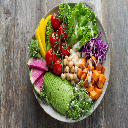

In [ ]:
show_image("content/dataset/food/healthy/Image_3.jpg", shape=(128, 128))

[ INFO ] Shape of image before (874, 1000, 3), resizing to (248, 248) 



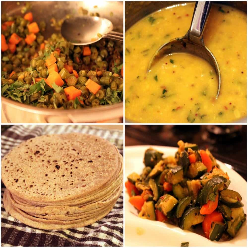

In [ ]:
show_image(save_image("http://pickyeaterblog.com/wp-content/uploads/2011/04/cover-picture.jpg"), shape=(248, 248))

## Data Preprocessing & Augmentation

In [ ]:
! pip install -U fastai

In [ ]:
! pip install fastbook

In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
path = Path("content/dataset/food")

In [ ]:
fns = get_image_files(path)

In [ ]:
fns

(#200) [Path('content/dataset/food/unhealthy/Image_69.jpg'),Path('content/dataset/food/unhealthy/Image_72.jpg'),Path('content/dataset/food/unhealthy/Image_14.jpg'),Path('content/dataset/food/unhealthy/Image_52.jpg'),Path('content/dataset/food/unhealthy/Image_98.jpg'),Path('content/dataset/food/unhealthy/Image_15.jpg'),Path('content/dataset/food/unhealthy/Image_4.jpg'),Path('content/dataset/food/unhealthy/Image_64.jpg'),Path('content/dataset/food/unhealthy/Image_26.jpg'),Path('content/dataset/food/unhealthy/Image_95.jpg')...]

In [ ]:
failed = verify_images(fns)
failed

(#0) []

In [ ]:
food = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))  

In [ ]:
dls = food.dataloaders(path)

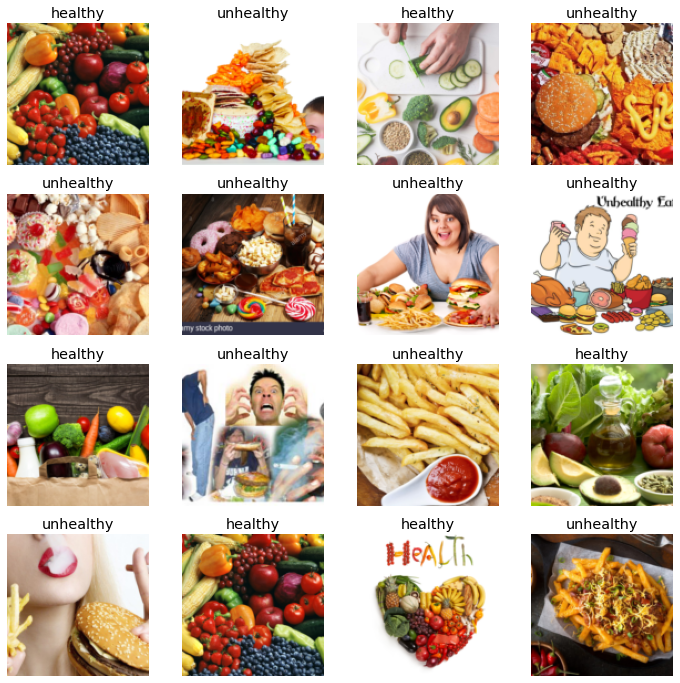

In [ ]:
dls.valid.show_batch(max_n=16, nrows=4)

In [ ]:
aug_transforms??

In [ ]:
food = food.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = food.dataloaders(path)

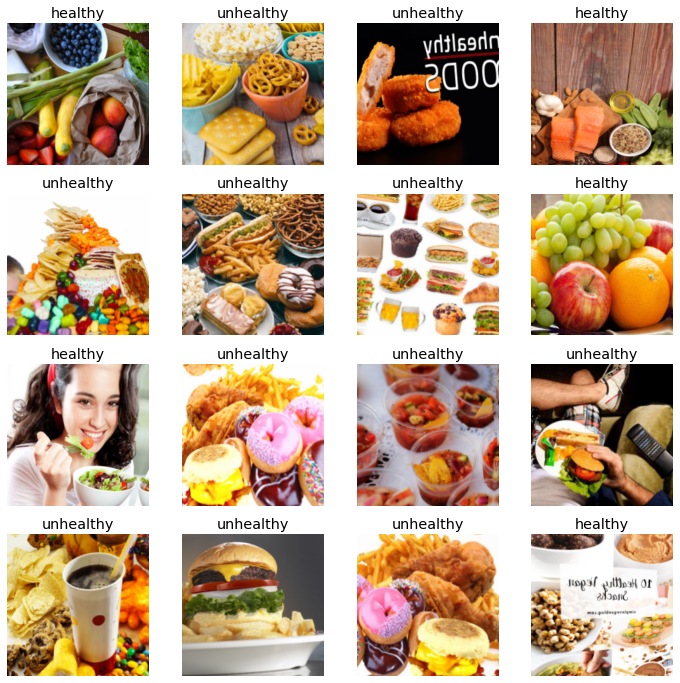

In [ ]:
dls.train.show_batch(max_n=16, nrows=4)

## Training Model

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


## Validation

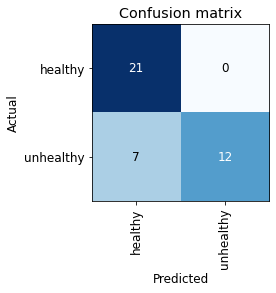

In [ ]:

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

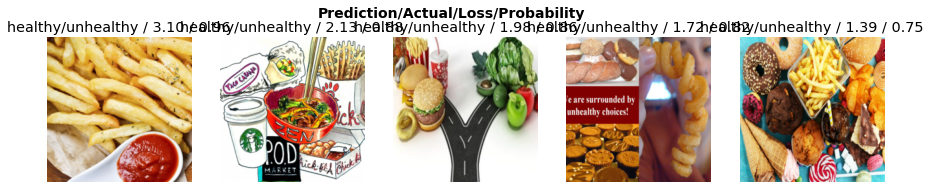

In [ ]:
interp.plot_top_losses(5, nrows=1)

### Clean more

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

## Model serialization

In [ ]:
learn.export()

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

## Model Inference

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('content/dataset/food/healthy/Image_1.jpg')

('healthy', tensor(0), tensor([9.9979e-01, 2.1011e-04]))